# CREDIT CARD CUSTOMER SEGMENTATION USING CLUSTERING & DIMENSIONALITY REDUCTION

## Objective

#####  The objective of this report is to develop a customer segmentation of active credit card users for a certain bank in order to define an efficient market strategy. This project is an example of unsupervised machine learning since we do not have a target variable. Therefore, we aim to segment our dataset into different clusters from which we can develop effective marketing strategies based on the various features that reflect customer behavior.

The dataset summarizes the usage behavior of about 9000 active credit card holders within a period of six months. The file consists of 18 behavioral variables, explained in the report. The dataset is extracted from Kaggle.

We use two clustering algorithms with a target of 3 clusters, namely K-Means and Agglomerative Clustering to segment our fata into two groups. PCA is used prior to clustering in order to bring down the dimensionality of our dataset and therefore obtain better segmentations.

One interesting result is the distribution of the clusters according to the variation of Balance with respect to Purchases. Balance is the balance amount left in the customer account to make purchases, while Purchases is the amount of purchases is the customer made from the account. According to K-Means (check figure below), the dataset is segmented into three interesting clusters. Cluster 0 represents the class of customers with low balance and medium purchases. Cluster 1 represents the class of customers with high balance and high purchases. Finally, cluster 2 represents the class of customers with high balance and low purchases.

As a result, different marketing campaigns can be set to target each of these clusters differently. For example, the bank might opt to ensure that cluster 1 is satisfied with the bank services, as both the balance and the purchases for this class are high. For cluster 2, however, the bank might opt to increase marketing campaigns so that customers from this class purchase more products. The reason is that customers from cluster 2 already have a high balance (i.e. they have the cash), but they are not purchasing many products. As for cluster 0, the bank might opt to encourage the low-medium purchase rate of this class by giving them loans to purchase, as this class seems to have relatively high purchases but low balance. 


#### Methodology and the Silhouette Score

Certainly, the Silhouette Score can serve both as a means to determine the optimum number of clusters and as a metric to evaluate the quality of your clustering model. Here's how it can be used for both purposes:

1. Determining Optimum Number of Clusters:

The Silhouette Score can help you identify the optimal number of clusters by assessing the quality of clusters for different values of K. The process involves calculating the Silhouette Score for each K and selecting the K that yields the highest Silhouette Score. Higher Silhouette Scores indicate better-defined and well-separated clusters.

For each value of K:

    Perform the clustering algorithm (e.g., K-Means) for the given K.
    Compute the Silhouette Score for each data point using the formula: Silhouette Score = (b - a) / max(a, b), where 'a' is the average distance from the data point to other points in the same cluster, and 'b' is the smallest average distance from the data point to points in a different cluster.
    Calculate the average Silhouette Score for all data points in the dataset.

Repeat this process for different values of K and choose the K that results in the highest average Silhouette Score. This K value corresponds to the one that produces the most well-separated clusters.

2. Evaluating Clustering Model Quality:

After you have determined the optimal number of clusters using the Silhouette Score, you can then use the same metric to evaluate the quality of the clustering model for that specific K.

For the chosen K value:

    Perform the clustering algorithm using the optimal number of clusters.
    Calculate the Silhouette Score for each data point.
    Compute the average Silhouette Score for all data points in the dataset.

A high average Silhouette Score for the chosen K indicates that the clustering algorithm has produced well-defined clusters. This implies that data points are closer to their own cluster's centroid compared to other clusters, validating the quality of the clustering.

In summary, the Silhouette Score is a versatile metric that not only helps you determine the optimal number of clusters but also provides a quantitative measure to evaluate the quality of your clustering model by assessing the degree of separation between clusters.

### 1. Data Description


Following is the Data Dictionary for Credit Card dataset:

    CUST_ID: Identification of Credit Card holder (Categorical)
    BALANCE: Balance amount left in their account to make purchases
    BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
    PURCHASES: Amount of purchases made from account
    ONEOFF_PURCHASES: Maximum purchase amount done in one-go
    INSTALLMENTS_PURCHASES: Amount of purchase done in installment
    CASH_ADVANCE: Cash in advance given by the user
    PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
    ONEOFFPURCHASESFREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
    PURCHASESINSTALLMENTSFREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
    CASHADVANCEFREQUENCY: How frequently the cash in advance being paid
    CASHADVANCETRX: Number of Transactions made with "Cash in Advanced"
    PURCHASES_TRX: Number of purchase transactions made
    CREDIT_LIMIT: Limit of Credit Card for user
    PAYMENTS: Amount of Payment done by user
    MINIMUM_PAYMENTS: Minimum amount of payments made by user
    PRCFULLPAYMENT: Percent of full payment paid by user
    TENURE: Tenure of credit card service for user



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ex
import plotly.graph_objs as go
# preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# ignore warnings
import warnings
warnings.filterwarnings(action="ignore")

# clustering
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from matplotlib import cm
from sklearn.metrics import silhouette_samples, silhouette_score

## 2. Loading the dataset

In [3]:
df = pd.read_csv('C:/Users/gauta/OneDrive/Desktop/CC GENERAl.csv')

In [4]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

## 3. Exploratory Data Analysis

In [193]:
df_copy = df.copy()

In [194]:
df_copy.shape

(8950, 18)

In [195]:
df_copy.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [74]:
## Checking for Null values

In [75]:
df_copy.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

### Observation: From the above results it can be concluded that we have 313 null values in the MINIMUM_PAYMENTS 
     #column while 1 null values in CREDIT_LIMIT variable, so to impute those null values first let us identify
     #the distribution of null values variables as follows:
        


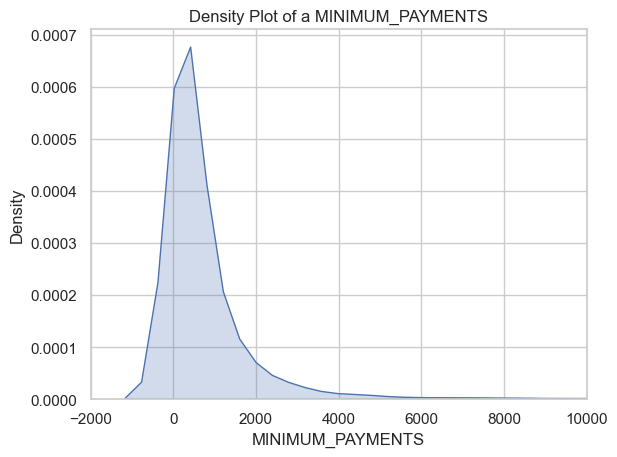

In [197]:
# Create a density plot using seaborn

sns.set(style="whitegrid")
sns.kdeplot(df_copy['MINIMUM_PAYMENTS'], shade=True)

# Add labels and title
plt.xlabel('MINIMUM_PAYMENTS')
plt.ylabel('Density')
plt.title('Density Plot of a MINIMUM_PAYMENTS')
plt.xlim(-2000,10000)
# Show the plot
plt.show()

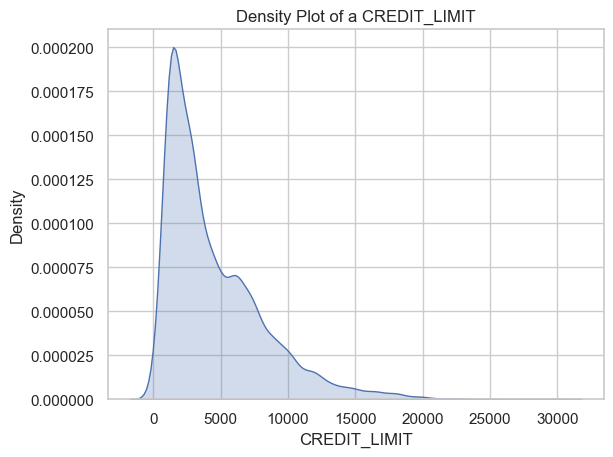

In [198]:
# Create a density plot using seaborn

sns.set(style="whitegrid")
sns.kdeplot(df_copy['CREDIT_LIMIT'], shade=True)

# Add labels and title
plt.xlabel('CREDIT_LIMIT')
plt.ylabel('Density')
plt.title('Density Plot of a CREDIT_LIMIT')
#plt.xlim(-2000,20000)
# Show the plot
plt.show()

In [199]:
## Observation: From the above density plots of variables having which having null values, it can be concluded that both
                # the vaiables have positively skewed-distribution, therefore, we are going to impute the null values with
                # median of the non-values

### Imputing the null values the median

In [200]:
df_copy = df_copy.fillna(df.median())

In [201]:
df_copy.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

### Now, since the variable CUSTOMER ID,  does not have having any significance in our analysis, therfore  we drop CUST_ID column, then normalize the input values using StandardScaler().

In [202]:
# drop ID column
df_copy = df_copy.drop('CUST_ID', 1)

df_copy.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [92]:
#data_imputed = pd.DataFrame(data_scaled, columns=df_copy.columns)

In [203]:
#data_imputed.head()

### Correlation HeatMap

In [204]:
corr_mat = df_copy.corr()
for x in range(len(corr_mat)):
    corr_mat.iloc[x,x] = 0

<AxesSubplot:>

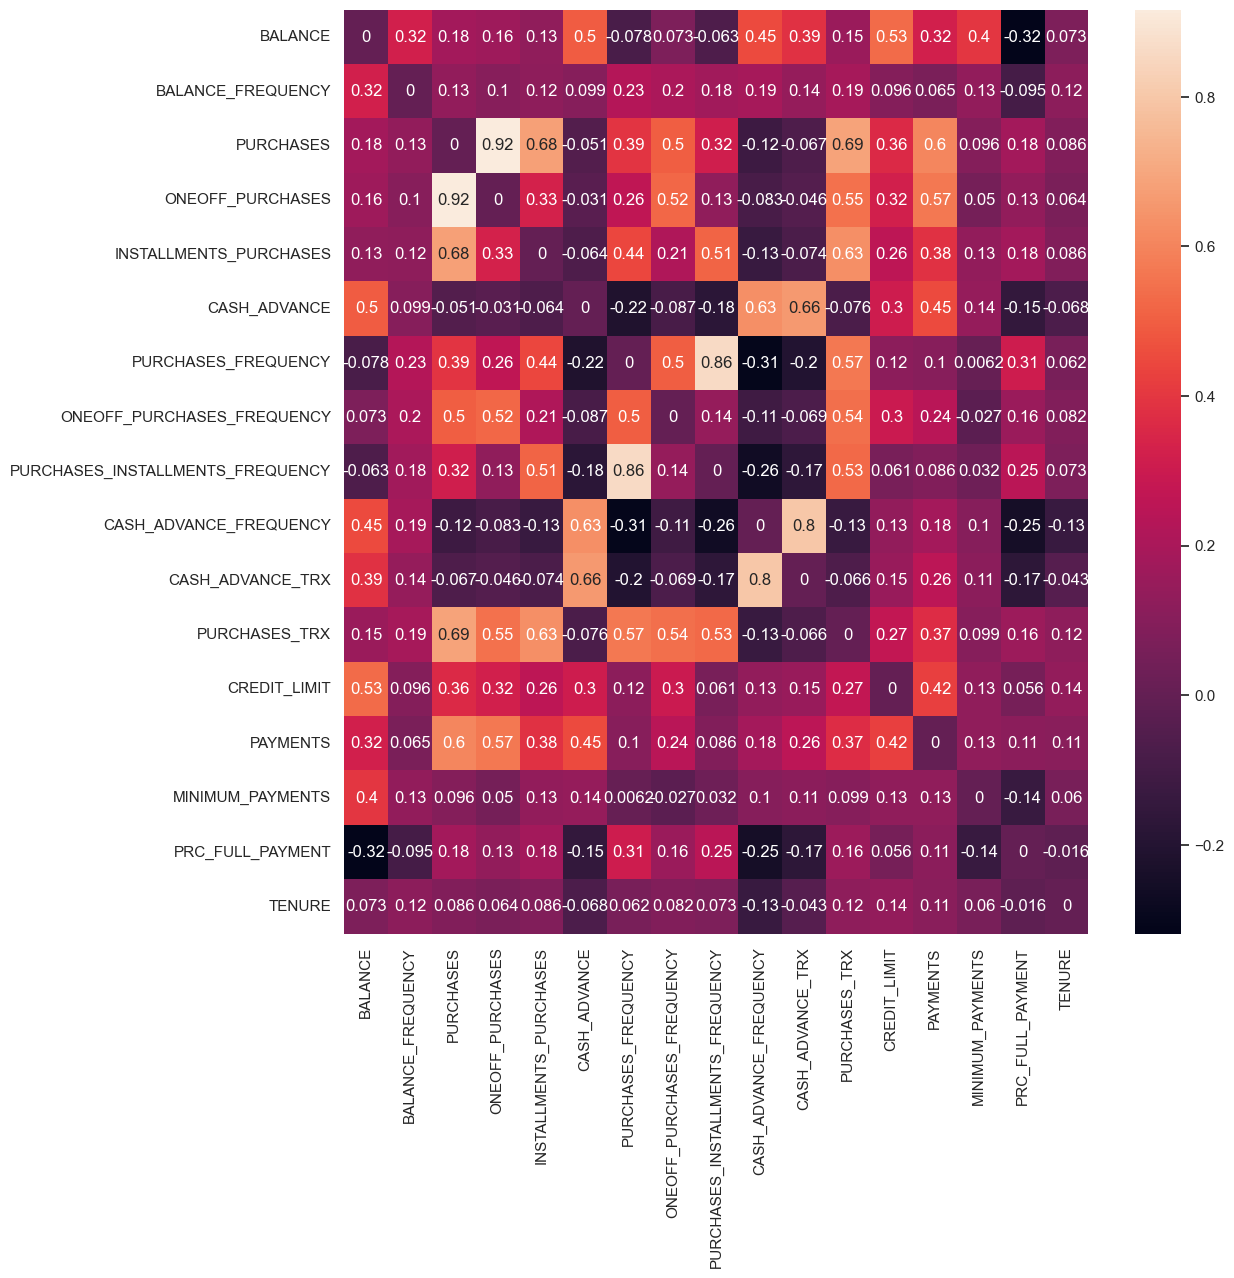

In [205]:
corr_mat
plt.figure(figsize = (12,12))
sns.heatmap(corr_mat,annot = True)

#### We can check the maximum correlation between fetaures 

In [206]:
corr_mat.abs().max().sort_values(ascending= False)

PURCHASES                           0.916845
ONEOFF_PURCHASES                    0.916845
PURCHASES_INSTALLMENTS_FREQUENCY    0.862934
PURCHASES_FREQUENCY                 0.862934
CASH_ADVANCE_FREQUENCY              0.799561
CASH_ADVANCE_TRX                    0.799561
PURCHASES_TRX                       0.689561
INSTALLMENTS_PURCHASES              0.679896
CASH_ADVANCE                        0.656498
PAYMENTS                            0.603264
ONEOFF_PURCHASES_FREQUENCY          0.544869
CREDIT_LIMIT                        0.531296
BALANCE                             0.531296
MINIMUM_PAYMENTS                    0.397920
BALANCE_FREQUENCY                   0.322412
PRC_FULL_PAYMENT                    0.318959
TENURE                              0.139222
dtype: float64

#####  
We notice that there exists high correlation among features (most of the values above are greater than 0.5). This suggests the use of dimensionality reduction before performing any clustering on the dataset.


Now let us check for the skew of the dataset

In [207]:
## Skewness in the dataset
skew_cols = df_copy.skew().sort_values(ascending = False)
skew_cols = skew_cols.loc[skew_cols > 0.75]
print(skew_cols)

MINIMUM_PAYMENTS              13.852446
ONEOFF_PURCHASES              10.045083
PURCHASES                      8.144269
INSTALLMENTS_PURCHASES         7.299120
PAYMENTS                       5.907620
CASH_ADVANCE_TRX               5.721298
CASH_ADVANCE                   5.166609
PURCHASES_TRX                  4.630655
BALANCE                        2.393386
PRC_FULL_PAYMENT               1.942820
CASH_ADVANCE_FREQUENCY         1.828686
ONEOFF_PURCHASES_FREQUENCY     1.535613
CREDIT_LIMIT                   1.522636
dtype: float64


#### 
We can see here all the features that have a skew greater than 0.75. To obtain better results, we 
will transform those features using a log transformation for normality by using the code below. 

In [208]:
for col in skew_cols.index.tolist():
    df_copy[col] = np.log1p(df_copy[col])



    Now that we have our skewed data normalized, we will standardize all columns using a standard 
    scaler. This is of utmost importance as clustering and dimensionality reduction work on distances. 
    Therefore, failing to scale our data will result in inaccurate clustering.

In [209]:
s = StandardScaler()
df_copy = s.fit_transform(df_copy)

In [210]:
df_copy = pd.DataFrame(df_copy,columns = corr_mat.columns)
df_copy

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-1.205218,-0.249434,-0.113532,-0.987090,0.394480,-0.930733,-0.806490,-0.732480,-0.707313,-0.724360,-0.810069,-0.579510,-1.447163,-0.824484,-0.829841,-0.556368,0.360680
1,0.948918,0.134325,-1.679855,-0.987090,-1.087454,1.528788,-1.221758,-0.732480,-0.916995,0.699592,0.784603,-1.379210,0.926060,1.065033,0.908184,0.391958,0.360680
2,0.824993,0.518084,0.600727,1.062022,-1.087454,-0.930733,1.269843,2.466762,-0.916995,-0.724360,-0.810069,0.487865,1.010229,-0.119300,0.450407,-0.556368,0.360680
3,0.624653,-1.016953,0.827499,1.265778,-1.087454,0.564372,-1.014125,-0.363042,-0.916995,-0.213583,-0.123281,-0.874655,1.010229,-4.161996,-0.144271,-0.556368,0.360680
4,0.271260,0.518084,-0.708481,-0.114307,-1.087454,-0.930733,-1.014125,-0.363042,-0.916995,-0.724360,-0.810069,-0.874655,-1.224909,-0.064979,-0.351833,-0.556368,0.360680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-1.379634,0.518084,0.266574,-0.987090,0.754107,-0.930733,1.269843,-0.732480,1.179833,-0.724360,-0.810069,0.037255,-1.447163,-0.525121,-1.715012,1.359774,-4.122768
8946,-1.568051,0.518084,0.276841,-0.987090,0.763821,-0.930733,1.269843,-0.732480,1.179833,-0.724360,-0.810069,0.037255,-1.447163,-0.628912,-0.144271,-0.556368,-4.122768
8947,-1.473834,-0.185477,0.027374,-0.987090,0.527794,-0.930733,0.854576,-0.732480,0.760469,-0.724360,-0.810069,-0.074955,-1.447163,-1.391318,-1.275542,0.498161,-4.122768
8948,-1.733775,-0.185477,-1.679855,-0.987090,-1.087454,0.086038,-1.221758,-0.732480,-0.916995,0.259328,0.278464,-1.379210,-2.291676,-1.661097,-1.604737,0.498161,-4.122768


#### We can see how the data is now on the same scale.

## 3. Dimensionality Reduction: Principal Component Analysis (PCA)

    It appears to be a high correlation among features from the figure regarding 
    𝑐𝑜𝑟𝑟_𝑚𝑎𝑡. 𝑎𝑏𝑠(). max(). Therefore, we suggest performing dimensionality reduction to reduce 
    the number of features (or columns). In that way, we avoid the curse of dimensionality when we 
    perform clustering later on. 
    At first, we will check the explained variance for reducing the number of columns to all possible 
    cases using PCA. Then, we will choose a number of components to reduce to with an acceptable 
    explained variance. In that way, we decrease the number of dimensions without affecting our 
    overall accuracy.

In [211]:
pca_list = list()
feature_weight_list = list()

for n in range(1,18):
    PCAmod = PCA(n_components = n)
    PCAmod.fit(df_copy)
    
    pca_list.append(pd.Series({'n':n , 'model': PCAmod,'var':PCAmod.explained_variance_ratio_.sum()}))
    weights = PCAmod.explained_variance_ratio_.reshape(-1,1)/PCAmod.explained_variance_ratio_.sum()
    overall_contributions = np.abs(PCAmod.components_)*weights
    abs_feature_values = overall_contributions.sum(axis = 0)
    feature_weight_list.append(pd.DataFrame({'n':n, 'features':df_copy.columns, 'values':abs_feature_values/(abs_feature_values.sum())}))

In [212]:
pca_df = pd.concat(pca_list, axis = 1).T.set_index('n')
print(pca_df)

                   model       var
n                                 
1    PCA(n_components=1)  0.341827
2    PCA(n_components=2)  0.562657
3    PCA(n_components=3)   0.65778
4    PCA(n_components=4)  0.731501
5    PCA(n_components=5)  0.797835
6    PCA(n_components=6)  0.847623
7    PCA(n_components=7)  0.889463
8    PCA(n_components=8)  0.920402
9    PCA(n_components=9)  0.945403
10  PCA(n_components=10)  0.961608
11  PCA(n_components=11)  0.972513
12  PCA(n_components=12)  0.980891
13  PCA(n_components=13)  0.987616
14  PCA(n_components=14)  0.993206
15  PCA(n_components=15)  0.995952
16  PCA(n_components=16)  0.998387
17  PCA(n_components=17)       1.0



    We can see here that the explained variance starts to plateau starting with dimensions = 11. 
    Therefore, we will reduce the number of columns from 18 to 11. In that way, when we perform 
    clustering, we attenuate the curse of dimensionality. 
    As a result, we will now fit our PCA model with 𝑛𝑐𝑜𝑚𝑝𝑜𝑛𝑒𝑛𝑡𝑠 = 11 and print down the transformed 
    values.

In [213]:
PCAmoduse = PCA(n_components = 11)
data_new = PCAmoduse.fit_transform(df_copy)
data_new = pd.DataFrame(data_new, columns = ['col' + str(x) for x in range(1,12)])
data_new

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11
0,-0.291818,-2.699888,-0.288148,-1.075615,0.347541,-0.093626,-0.693921,-0.299744,0.276258,-0.424797,0.231316
1,-3.441784,1.020425,-0.062540,-0.140750,-1.764253,-0.460694,0.693577,-0.063734,-0.257557,0.456049,-0.401522
2,1.516035,1.297397,2.645237,-0.968518,0.756675,-0.165148,0.444925,0.804132,0.079227,1.179811,0.614358
3,-1.268351,-1.136656,1.875031,-0.495165,1.583843,2.349844,0.287588,2.433599,-0.850853,-1.561132,-1.294751
4,-1.133529,-1.333936,0.869064,-1.722874,0.384670,-1.214507,-0.298808,-0.368593,0.323380,-0.157429,0.178926
...,...,...,...,...,...,...,...,...,...,...,...
8945,1.753187,-2.834068,-2.125977,2.326019,1.994886,-2.224169,1.708391,-0.223659,0.532259,-0.062144,0.209290
8946,1.274674,-2.136864,-2.249803,1.156171,3.031893,-1.089789,1.904240,-0.824052,0.353987,0.329201,0.801702
8947,1.019632,-3.257488,-1.723085,1.932583,2.644707,-1.211932,1.761222,-0.190910,0.219101,0.090091,0.270609
8948,-2.743205,-3.875923,-0.506842,2.469802,2.571326,-1.958584,0.796115,0.074436,0.144375,0.117633,0.174079


### Notice that our dataset now contains 11 columns instead of 18. Now we are ready to perform clustering

## 4.Determining the Optimum value of number of cluters (k) through Elbow curve and the DendoGram

In [49]:
# WCSS (inertia) for different k values
# inertia plotter function
def inertia_plot(clust, X, start = 2, stop = 20):
    inertia = []
    for x in range(start,stop):
        km = clust(n_clusters = x)
        labels = km.fit_predict(X)
        inertia.append(km.inertia_)
    plt.figure(figsize = (12,6))
    plt.plot(range(start,stop), inertia, marker = 'o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow Curve', fontsize = 16)
    plt.xticks(list(range(start, stop)))
    plt.show()

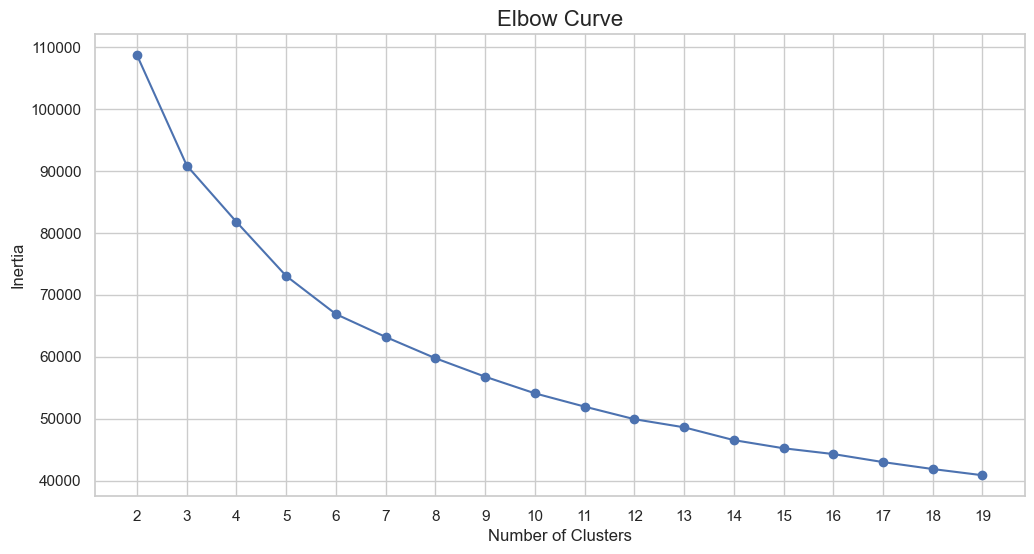

In [50]:
inertia_plot(KMeans, data_new)

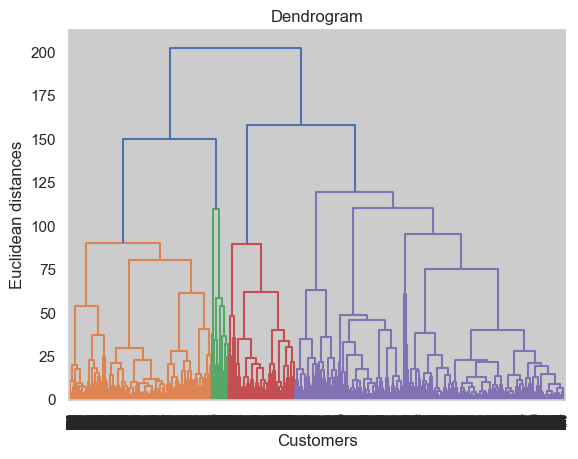

In [47]:
# Defining the best number of clusters with dendrogram

import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(data_imputed, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

### From the above Elbow curve and Dendogram, we get the optimum value of k as 3


### Silhouette Scores

Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1].

We will now check the silhouette scores for different numbers of clusters.


### 5. Clustering with 𝑲𝑴𝒆𝒂𝒏𝒔 with k = 3

In this section, we use 𝐾𝑀𝑒𝑎𝑛𝑠 with k = 3 as a first clustering method to segment active credit card customers into three segments according to the features produced by the PCA model above.

In [168]:
km = KMeans(n_clusters = 3)
y_pred_km = km.fit_predict(data_new)
data_new['Clusters']= y_pred_km
### Add it also to the origianl data frame
df_copy['Clusters'] = y_pred_km

### 
Notice that we add an extra column called clusters which shows the cluster class, in this case 0,1 𝑜𝑟 2, for each observation.
Now that we have the cluster classes of all our observations, we can produce a pair plot, hued by cluster. 


In [169]:
df_copy.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Clusters
0,-1.205218,-0.249434,-0.113532,-0.987090,0.394480,-0.930733,-0.806490,-0.732480,-0.707313,-0.724360,-0.810069,-0.579510,-1.447163,-0.824484,-0.829841,-0.556368,0.36068,0
1,0.948918,0.134325,-1.679855,-0.987090,-1.087454,1.528788,-1.221758,-0.732480,-0.916995,0.699592,0.784603,-1.379210,0.926060,1.065033,0.908184,0.391958,0.36068,1
2,0.824993,0.518084,0.600727,1.062022,-1.087454,-0.930733,1.269843,2.466762,-0.916995,-0.724360,-0.810069,0.487865,1.010229,-0.119300,0.450407,-0.556368,0.36068,2
3,0.624653,-1.016953,0.827499,1.265778,-1.087454,0.564372,-1.014125,-0.363042,-0.916995,-0.213583,-0.123281,-0.874655,1.010229,-4.161996,-0.144271,-0.556368,0.36068,0
4,0.271260,0.518084,-0.708481,-0.114307,-1.087454,-0.930733,-1.014125,-0.363042,-0.916995,-0.724360,-0.810069,-0.874655,-1.224909,-0.064979,-0.351833,-0.556368,0.36068,0


In [60]:
data_new_new =  data_new.copy()

In [61]:
data_new_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   col1      8950 non-null   float64
 1   col2      8950 non-null   float64
 2   col3      8950 non-null   float64
 3   col4      8950 non-null   float64
 4   col5      8950 non-null   float64
 5   col6      8950 non-null   float64
 6   col7      8950 non-null   float64
 7   col8      8950 non-null   float64
 8   col9      8950 non-null   float64
 9   col10     8950 non-null   float64
 10  col11     8950 non-null   float64
 11  Clusters  8950 non-null   int32  
dtypes: float64(11), int32(1)
memory usage: 804.2 KB


In [67]:
data_new_new['Clusters']

0       0
1       1
2       2
3       0
4       0
       ..
8945    0
8946    0
8947    0
8948    0
8949    0
Name: Clusters, Length: 8950, dtype: int32

In [170]:
df_copy

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Clusters
0,-1.205218,-0.249434,-0.113532,-0.987090,0.394480,-0.930733,-0.806490,-0.732480,-0.707313,-0.724360,-0.810069,-0.579510,-1.447163,-0.824484,-0.829841,-0.556368,0.360680,0
1,0.948918,0.134325,-1.679855,-0.987090,-1.087454,1.528788,-1.221758,-0.732480,-0.916995,0.699592,0.784603,-1.379210,0.926060,1.065033,0.908184,0.391958,0.360680,1
2,0.824993,0.518084,0.600727,1.062022,-1.087454,-0.930733,1.269843,2.466762,-0.916995,-0.724360,-0.810069,0.487865,1.010229,-0.119300,0.450407,-0.556368,0.360680,2
3,0.624653,-1.016953,0.827499,1.265778,-1.087454,0.564372,-1.014125,-0.363042,-0.916995,-0.213583,-0.123281,-0.874655,1.010229,-4.161996,-0.144271,-0.556368,0.360680,0
4,0.271260,0.518084,-0.708481,-0.114307,-1.087454,-0.930733,-1.014125,-0.363042,-0.916995,-0.724360,-0.810069,-0.874655,-1.224909,-0.064979,-0.351833,-0.556368,0.360680,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-1.379634,0.518084,0.266574,-0.987090,0.754107,-0.930733,1.269843,-0.732480,1.179833,-0.724360,-0.810069,0.037255,-1.447163,-0.525121,-1.715012,1.359774,-4.122768,0
8946,-1.568051,0.518084,0.276841,-0.987090,0.763821,-0.930733,1.269843,-0.732480,1.179833,-0.724360,-0.810069,0.037255,-1.447163,-0.628912,-0.144271,-0.556368,-4.122768,0
8947,-1.473834,-0.185477,0.027374,-0.987090,0.527794,-0.930733,0.854576,-0.732480,0.760469,-0.724360,-0.810069,-0.074955,-1.447163,-1.391318,-1.275542,0.498161,-4.122768,0
8948,-1.733775,-0.185477,-1.679855,-0.987090,-1.087454,0.086038,-1.221758,-0.732480,-0.916995,0.259328,0.278464,-1.379210,-2.291676,-1.661097,-1.604737,0.498161,-4.122768,1


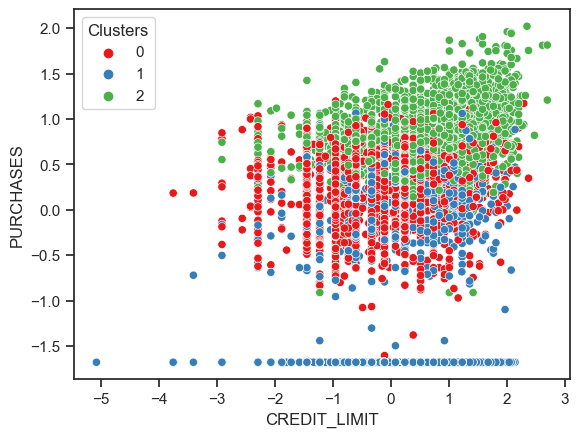

In [171]:
sns.set(style="ticks")
sns.scatterplot(data = df_copy,x = df_copy['CREDIT_LIMIT'] , y= df_copy['PURCHASES'],hue=df_copy['Clusters'], palette="Set1")
plt.show()

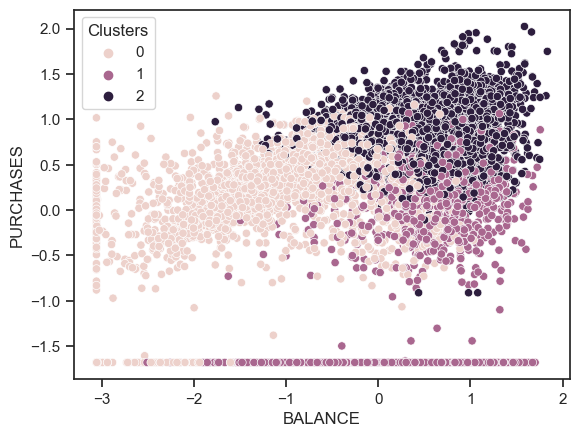

In [172]:
ax = sns.scatterplot(data = df_copy,x = df_copy['BALANCE'],y = df_copy['PURCHASES'],hue = df_copy['Clusters'])

### 
Note the distribution of the clusters in the graph above. Group 0 represents the class of customers 
with low balance and low-medium purchases. Group 1 represents the class of customers with high 
balance and low purchases. As for group 2, it represents the class of customers with high balance 
and high purchases.



We can also count the number of customers in each cluster.

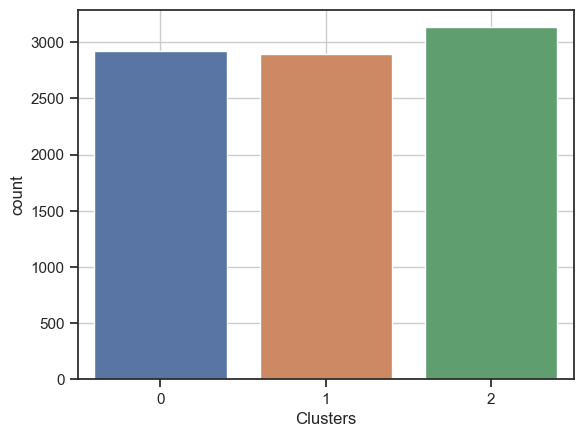

In [173]:
sns.countplot(x = df_copy['Clusters'])
plt.grid()
plt.show()

#### We can see that the number of customers in each cluster is approximately the same.

### 6. Clustering with Agglomerative Clustering with k = 𝟑
Let us try to segment the data into three clusters, but using an Agglomerative clustering model 
instead of K-Means. The difference between the two models is that K-Means groups the data 
according to the distance between the data points and the cluster centroids. Agglomerative 
Clustering, however, groups the data according to the distance between the data points and other 
data points/ clusters. 

In [174]:
data_new.head()

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,Clusters
0,-0.443295,-2.642959,-0.231578,-1.104231,0.389897,-0.029970,-0.714784,-0.320985,0.260710,-0.289351,-0.535827,0
1,-3.609346,1.216329,-0.085260,-0.090760,-1.771698,-0.377765,0.656133,-0.112856,-0.281941,0.474390,0.046933,1
2,1.926225,1.270618,2.663751,-0.974147,0.682259,-0.225841,0.449264,0.778407,0.035692,1.220436,0.053987,2
3,-1.238198,-0.979037,1.957867,-0.554825,1.659039,2.236658,0.389615,2.473474,-0.861490,-1.488040,-0.458904,0
4,-1.150113,-1.204677,0.921498,-1.737548,0.343729,-1.162544,-0.354297,-0.421146,0.290481,-0.000341,-0.487245,0


In [175]:
AC = AgglomerativeClustering(n_clusters = 3)
y_pred_ac = AC.fit_predict(data_new)
data_new['Clusters'] = y_pred_ac
## add it also to the original data frame
df_copy['Clusters_ac'] = y_pred_ac

##

After fitting the agglomerative clustering model with 𝑛 = 3, we can produce a pair plot of the data, 
hued by clusters, as we did before with K-Means. The results are shown below.

In [176]:
df_copy.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Clusters,Clusters_ac
0,-1.205218,-0.249434,-0.113532,-0.987090,0.394480,-0.930733,-0.806490,-0.732480,-0.707313,-0.724360,-0.810069,-0.579510,-1.447163,-0.824484,-0.829841,-0.556368,0.36068,0,0
1,0.948918,0.134325,-1.679855,-0.987090,-1.087454,1.528788,-1.221758,-0.732480,-0.916995,0.699592,0.784603,-1.379210,0.926060,1.065033,0.908184,0.391958,0.36068,1,1
2,0.824993,0.518084,0.600727,1.062022,-1.087454,-0.930733,1.269843,2.466762,-0.916995,-0.724360,-0.810069,0.487865,1.010229,-0.119300,0.450407,-0.556368,0.36068,2,2
3,0.624653,-1.016953,0.827499,1.265778,-1.087454,0.564372,-1.014125,-0.363042,-0.916995,-0.213583,-0.123281,-0.874655,1.010229,-4.161996,-0.144271,-0.556368,0.36068,0,0
4,0.271260,0.518084,-0.708481,-0.114307,-1.087454,-0.930733,-1.014125,-0.363042,-0.916995,-0.724360,-0.810069,-0.874655,-1.224909,-0.064979,-0.351833,-0.556368,0.36068,0,0


##
We can see how the clustering differs between the two models, the reason being that each one of 
the models has its own algorithm for clustering. 
To make it clearer, we will produce the exact same scatter plot of Purchases versus Balance, 
segmented by clusters according to the results of the Agglomerative Clustering Model. Results are 
shown below

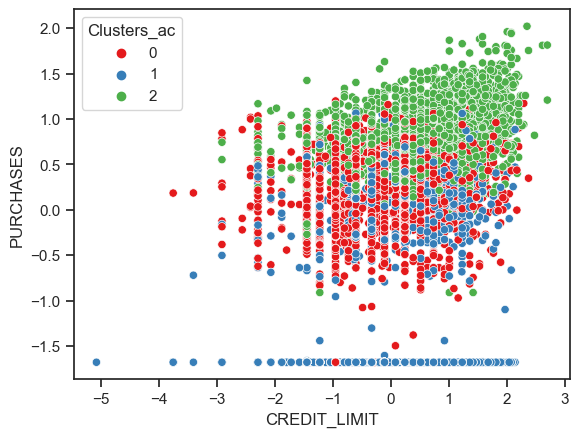

In [177]:
sns.set(style="ticks")
sns.scatterplot(data = df_copy,x = df_copy['CREDIT_LIMIT'] , y= df_copy['PURCHASES'],hue=df_copy['Clusters_ac'], palette="Set1")
plt.show()

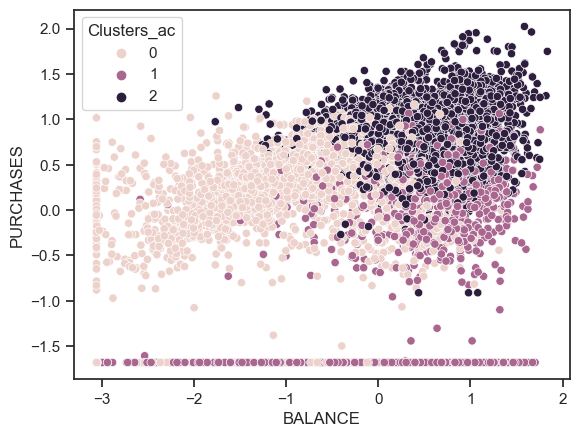

In [178]:
ax = sns.scatterplot(data = df_copy,x = df_copy['BALANCE'],y = df_copy['PURCHASES'],hue = df_copy['Clusters_ac'])

## NOTE: Notice how Agglomerative Clustering segments cluster 1 separately from the others.

### 6. Model Performance through Silhouette Scores

In [179]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [180]:
df_c = df.copy()

In [181]:
del df_c['CUST_ID']

In [182]:
df_c = df_c.fillna(df_c.median())

In [183]:
df_c.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [188]:
from sklearn.metrics import silhouette_samples

# Assuming 'model' is your fitted clustering model and 'data' is your dataset
# 'labels' are the cluster assignments from the fitted model

silhouette_scores_algo = max(silhouette_samples(df_c, df_copy['Clusters_ac']))
silhouette_scores_Kmeans = max(silhouette_samples(df_c, df_copy['Clusters']))

In [189]:
silhouette_scores_Kmeans

0.5534626659952997

In [190]:
silhouette_scores_algo

0.5365374887511515

### 7. Summary and Key Insights 

In this report, we used two clustering algorithms, namely K-Means and Agglomerative 
Clustering, to segment active credit card customers of a certain bank into three different clusters. 
Principal Component Analysis (PCA) was used to bring down the dimensionality of the dataset so 
that we obtain more efficient and predictive models.



Considering Balance and Purchases, K-Means segments the customers into the following three 
clusters. Cluster 0 represents the class of customers with law balance and law-medium purchases. 
Cluster 2 represents the class of customers with high balance and low purchases. Finally, cluster 1
represents the class of customers with high balance and high purchases. 

As a result, different marketing campaigns can be set to target each of these clusters differently. For example, the bank 
might opt to ensure that cluster 1 is satisfied with the bank services, as both the balance and the 
purchases for this class are high. For cluster 2, however, the bank might opt to increase marketing 
campaigns so that customers from this class purchase more products. The reason is that customers 
from cluster 2 already have a high balance (i.e. they have the cash), but they are not purchasing 
many products. As for cluster 0, the bank might opt to encourage the low-medium purchase rate 
of this class by giving them loans to purchase, as this class seems to have relatively high purchases 
but low balance. 
As for Agglomerative clustering, the data is segmented differently. Therefore, management 
might choose a different approach in dealing with each cluster